# British Airways Review Analysis

In this project, I scraped and analyzed customer reviews for British Airways from Skytrax to uncover sentiment trends and commonly mentioned themes. This project demonstrates web scraping, text preprocessing, sentiment analysis, and data visualization using Python in a Jupyter environment.


### Installing Core Libraries

We install the required libraries:  
- `requests` for fetching web pages  
- `beautifulsoup4` for parsing HTML  
- `pandas` for data manipulation  


In [3]:
!pip install requests beautifulsoup4 pandas

!pip install vaderSentiment

In [5]:
!pip install wordcloud

### Importing Necessary Libraries

We import libraries for HTTP requests, parsing HTML, handling data, and regular expressions.


In [7]:
import requests
import pandas as pd
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup


### Defining the Review Scraper

This function takes a review page URL from Skytrax and extracts all visible customer review texts from that page.


In [9]:
def get_reviews_from_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    reviews = []

    # Find all review containers
    containers = soup.find_all('div', class_ = 'text_content')

    for container in containers:
        review_text = container.get_text(strip = True)
        reviews.append(review_text)

    return reviews

### Scraping 100 Pages of Reviews

Using the defined function, we scrape the first 100 pages of British Airways reviews to collect approximately 1,000 review texts.


In [11]:
# Scrape 100 pages = approx. 1000 reviews
all_reviews = []

for page in range(1, 101):
    url = f"https://www.airlinequality.com/airline-reviews/british-airways/page/{page}/"
    print(f"Scraping page {page}...")
    
    try:
        reviews = get_reviews_from_page(url)
        all_reviews.extend(reviews)
        time.sleep(1)  # pause to be polite to the server
    except Exception as e:
        print(f"Error on page {page}: {e}")
        continue

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

### Saving Scraped Reviews to CSV

The reviews are stored in a Pandas DataFrame and exported to a CSV file for further analysis.


In [13]:
# Convert to DataFrame and save
df = pd.DataFrame(all_reviews, columns=["review"])
df.to_csv("/Users/mark-danielstamakloe/Desktop/My Projects/British_Airlines_Project/british_airways_reviews.csv", index=False)
print("✅ Done! Saved 1000+ reviews to 'data/british_airways_reviews.csv'")

✅ Done! Saved 1000+ reviews to 'data/british_airways_reviews.csv'


### Loading the Review Dataset

We load the scraped CSV dataset for processing and analysis.


In [15]:
# Load the reviews
df = pd.read_csv("british_airways_reviews.csv")

# Preview the data
df.head()


,review
0,Not Verified| Check in was smooth enough. Boa...
1,✅Trip Verified| Although transferring to this ...
2,✅Trip Verified| We are extremely grateful to...
3,✅Trip Verified| I had an appalling experienc...
4,"Not Verified| Good points, the cabin crew, th..."


### Cleaning the Review Texts

We remove punctuation, numeric characters, extra whitespace, and convert all text to lowercase to prepare for sentiment analysis.


In [17]:
# Remove duplicates and missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Basic cleaning: remove special characters and lowercase everything
def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text)         # Remove extra spaces
    return text.lower().strip()

df['cleaned_review'] = df['review'].apply(clean_text)
df.head()


,review,cleaned_review
0,Not Verified| Check in was smooth enough. Boa...,not verified check in was smooth enough boardi...
1,✅Trip Verified| Although transferring to this ...,trip verified although transferring to this fl...
2,✅Trip Verified| We are extremely grateful to...,trip verified we are extremely grateful to the...
3,✅Trip Verified| I had an appalling experienc...,trip verified i had an appalling experience wi...
4,"Not Verified| Good points, the cabin crew, th...",not verified good points the cabin crew they w...


### Sentiment Analysis Using VADER

We use VADER (Valence Aware Dictionary for sEntiment Reasoning) to analyze the sentiment of each cleaned review and classify it as Positive, Neutral, or Negative.


In [19]:
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment scoring
df['sentiment_score'] = df['cleaned_review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Label each review
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_score'].apply(label_sentiment)
df['sentiment'].value_counts()


sentiment
Negative    521
Positive    460
Neutral      19
Name: count, dtype: int64

### Sentiment Distribution Visualization

We visualize the number of positive, neutral, and negative reviews using a bar chart.


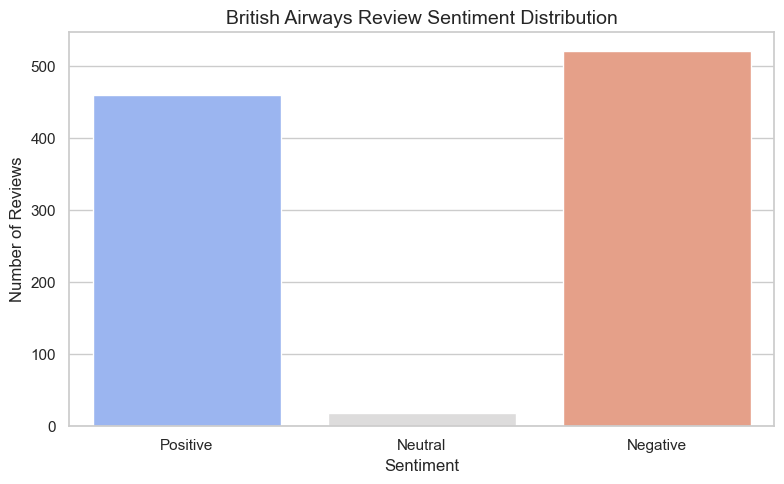

In [21]:
# Set style
sns.set(style="whitegrid")

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', order=['Positive', 'Neutral', 'Negative'], palette='coolwarm')

plt.title("British Airways Review Sentiment Distribution", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.tight_layout()
plt.show()


### Word Cloud of Most Common Words

We generate a word cloud from all cleaned review texts to visualize the most frequently mentioned words across customer feedback.


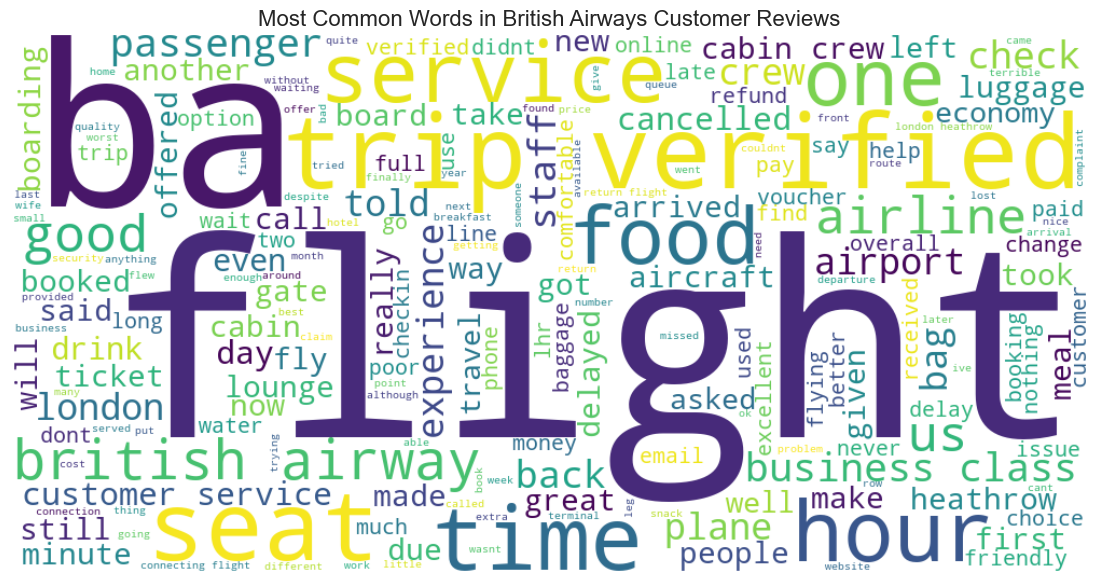

In [23]:
# Combine all cleaned reviews into one text blob
text_blob = " ".join(df['cleaned_review'].tolist())

# Create and display the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='viridis').generate(text_blob)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in British Airways Customer Reviews", fontsize=16)
plt.show()


## Summary & Key Insights

- Scraped 1,000+ British Airways reviews from Skytrax
- Applied sentiment analysis:  
  - **Negative reviews (52%)** slightly outweigh **positive reviews (46%)**
  - Very few neutral reviews
- Most common themes include: "flight", "food", "luggage", "staff", "delay"
- Common complaints relate to **delays, baggage issues, and staff service**
- Positive reviews often highlight **business class, inflight comfort, and crew friendliness**

These insights can inform customer experience improvements for British Airways.
